In [1]:
import numpy as np 
import pandas as pd
import os, re
import matplotlib.pyplot as plt
from tqdm import tqdm
from numba import njit
from time import perf_counter as pc

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# plt.style.use(["notebook", "science"])
plt.rcParams["figure.figsize"] = [15, 7]
plt.rcParams["figure.dpi"] = 150
plt.rcParams["lines.linewidth"] = 2

np.set_printoptions(linewidth=200)
np.set_printoptions(precision=3)

# TODO
1. Transform one sample to the perturbed version.
2. Use a function to transform all samples. 
3. Use the perturbed dataset as the current dataset and apply the function defined in step 2 to add even more perturbation. 

In [2]:
map_path = "raw txt-input 6186 samples 10 nodes/"

dir_list = os.listdir(map_path) # all the files
paths = [file for file in dir_list if file.endswith(".txt")] # filtering out files which is not txt
# a list with arrays 
dataset = [np.loadtxt(map_path + path) for path in tqdm(paths)]

100%|██████████| 6186/6186 [00:02<00:00, 2208.73it/s]


/Users/sunandclouds/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


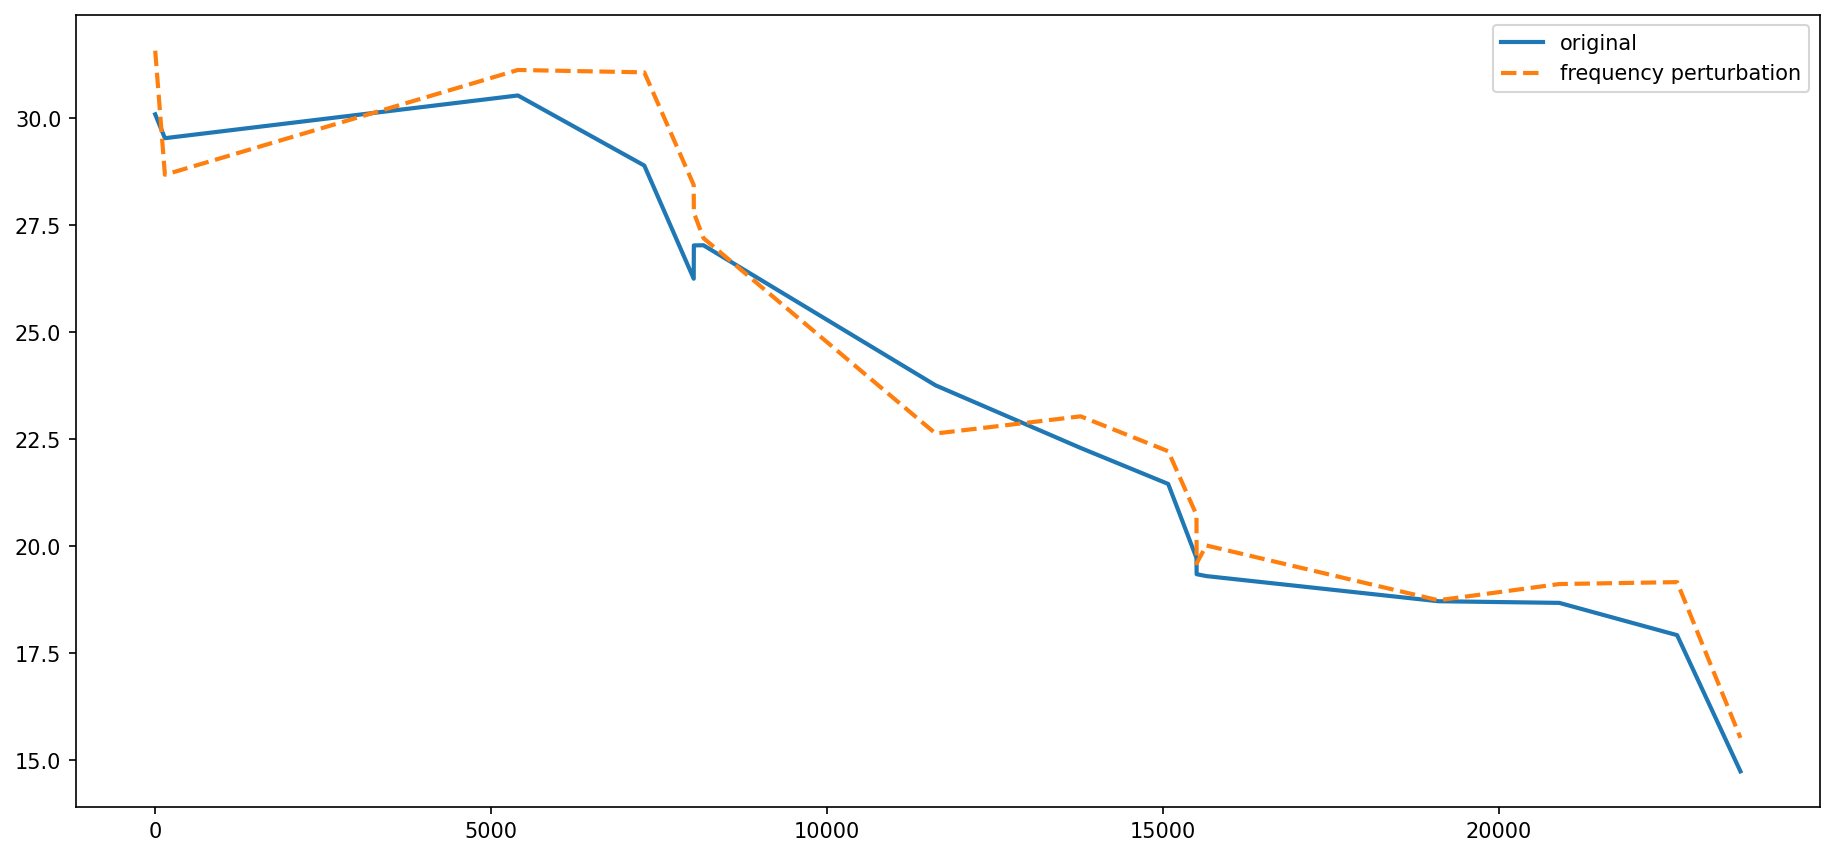

In [104]:
i = np.random.randint(0, 6186)
data = dataset[i]
LHGR = data[:,6:]
FASTF = data[:,1]

# Generate random data
noise = 20 * np.random.rand(*LHGR.shape)
fft_data = np.fft.fft(LHGR) + noise
frequency_data = np.fft.ifft(fft_data)

plt.plot(data[:,0], LHGR[:,4], label="original")
plt.plot(data[:,0], frequency_data[:,4], "--", label="frequency perturbation")
plt.legend()
plt.show()

In [190]:
def generate_new_LHGR(LHGR, noise_factor=0, seed=0):
    np.random.seed(seed)
    noise = noise_factor * np.random.rand(*LHGR.shape)
    fft_data = np.fft.fft(LHGR) + noise
    frequency_data = np.fft.ifft(fft_data)
    return frequency_data.real

def generate_new_LHGRs(dataset, noise_factor=0, seed=0):
    new_LHGRs = []
    for i, data in enumerate(dataset):
        LHGR_original = data[:,6:]
        LHGR_perturbed = generate_new_LHGR(LHGR_original, noise_factor, i)
        new_LHGRs.append(LHGR_perturbed - noise_factor/2)
        
    return new_LHGRs
        

result = generate_new_LHGRs(dataset, 20)
re

In [191]:
np.save("raw npy-input 62455 samples 10 nodes/perturbed_LHGR_dataset.npy", result, allow)

/Users/sunandclouds/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [192]:
result

[array([[12.134,  5.759,  5.859,  7.337,  9.373,  7.936,  9.076,  6.607,  3.732, -1.663],
        [13.127, 11.208,  6.441,  9.829,  9.505,  5.756,  8.464,  7.64 ,  2.162,  1.364],
        [14.742, 10.095,  8.347,  9.543, 10.44 ,  4.864,  9.731,  7.993,  5.019,  0.655],
        [15.003,  9.091,  6.989,  6.139,  7.393,  5.289,  7.13 ,  5.663,  5.813,  1.642],
        [ 6.656,  1.186,  2.855,  0.207,  2.814,  4.637,  4.42 ,  3.526,  7.708,  1.346],
        [ 2.291, -3.257, -4.543, -4.315, -2.651,  1.503, -0.791, -0.554,  0.922, -0.674],
        [12.838, 12.341, 13.995, 13.366, 14.912, 17.495, 12.538,  8.665,  6.843, -0.712],
        [17.503, 16.783, 15.788, 16.48 , 14.855, 16.805, 12.278, 11.333,  7.459,  1.962],
        [17.018, 14.256, 14.344, 13.683, 11.035, 11.621,  9.796, 11.154,  9.883,  2.686],
        [15.961, 13.757, 12.704, 12.986, 11.975, 13.066, 11.047, 11.129,  9.408,  3.284],
        [17.48 , 10.701, 10.313, 11.661, 11.762,  9.667, 12.438, 12.993, 11.683,  5.334],
        [1

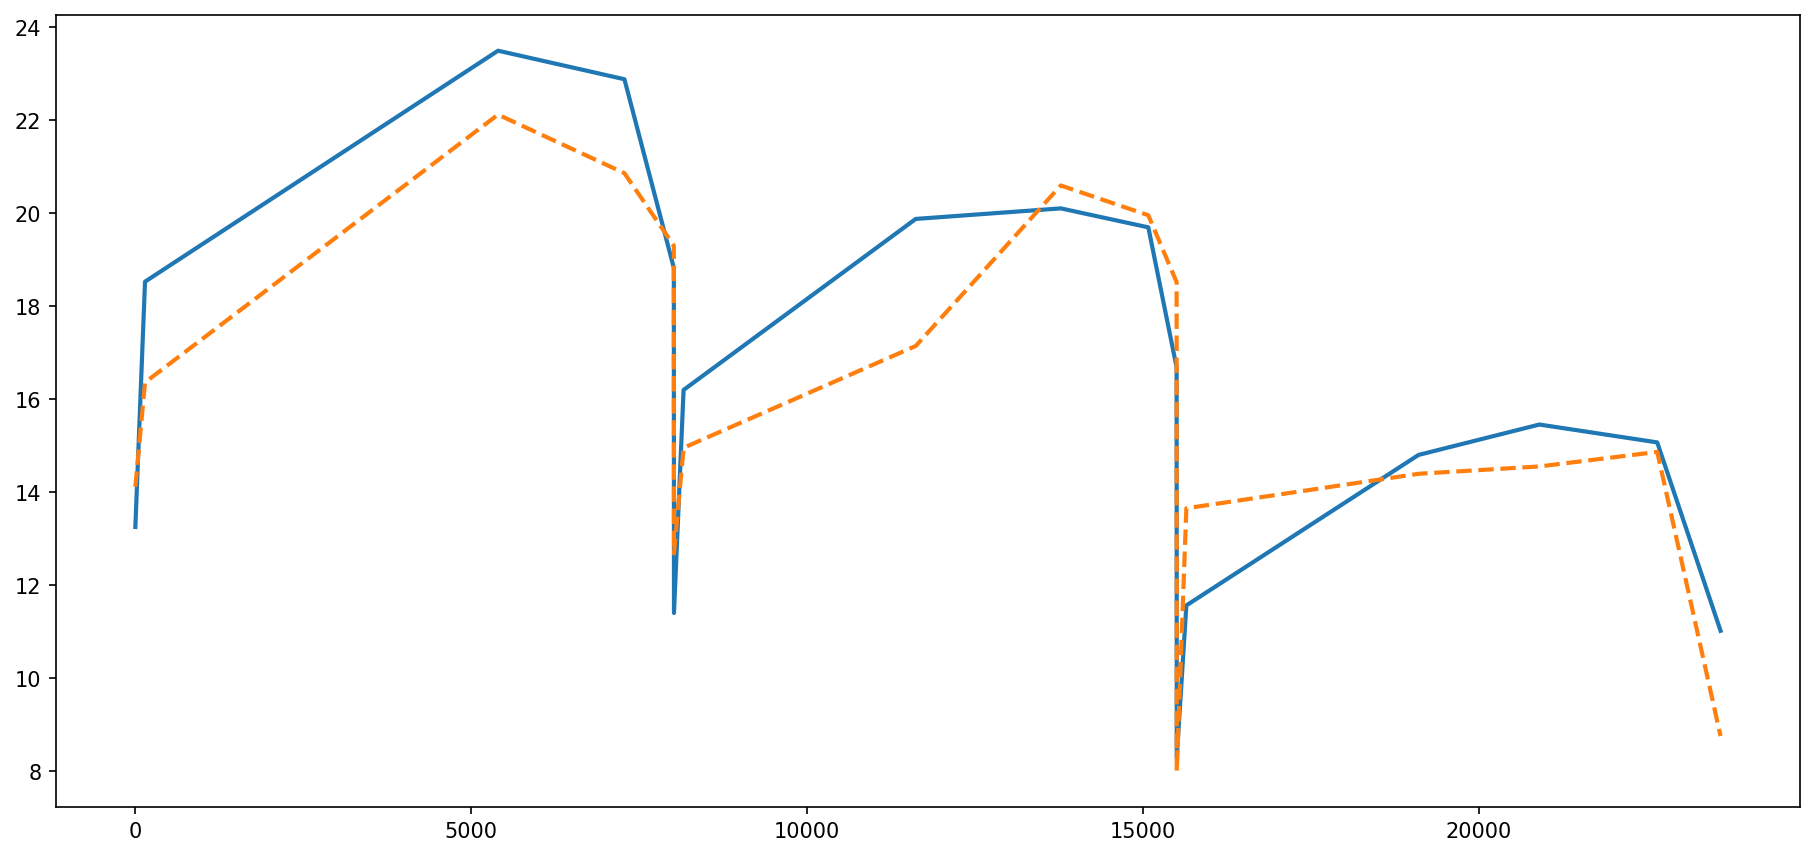

In [189]:
i = np.random.randint(0, 100)
plt.plot(dataset[i][:,0], dataset[i][:,6])
plt.plot(dataset[i][:,0], result[i][:,0], "--")